In [31]:
import json
import requests
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
url = 'https://defillama-kx4jyt9ta-defillama-team.vercel.app/yields/'
f = requests.get(url, allow_redirects=True)

In [3]:
#from https://stackoverflow.com/questions/65910282/jsondecodeerror-invalid-escape-when-parsing-from-python
class LazyDecoder(json.JSONDecoder):
    def decode(self, s, **kwargs):
        regex_replacements = [
            (re.compile(r'([^\\])\\([^\\])'), r'\1\\\\\2'),
            (re.compile(r',(\s*])'), r'\1'),
        ]
        for regex, replacement in regex_replacements:
            s = regex.sub(replacement, s)
        return super().decode(s, **kwargs)

In [4]:
marker1 = '<script id="__NEXT_DATA__" type="application/json">'
marker2 = '</script>'
s = str(f.content)
markerLocation1 = s.find(marker1)
markerLocation2 = s.find(marker2, markerLocation1)
s2 = s[markerLocation1+len(marker1):markerLocation2]
j = json.loads(s2, cls=LazyDecoder)

In [20]:
marker3='"mu":'
markerLocation3=s.find(marker3)
display(s[markerLocation3-10:markerLocation3+10])

''

In [21]:
# if you have it in a file
file='D:\code\chart\llama.json'
s = open(file, 'r', encoding='utf-8').read()
j = json.loads(s)

In [22]:
# display(j)

In [23]:
d = j['props']['pageProps']
display(d.keys())

dict_keys(['pools', 'chainList', 'projectList'])

In [24]:
df = pd.DataFrame(d['pools'])

In [42]:
df.head(2)

,chain,project,symbol,tvlUsd,apy,pool,apyPct1D,apyPct7D,apyPct30D,projectName,...,predictions,audits,audit_links,url,twitter,category,return,sigma,mu,count
0,Ethereum,lido,stETH,4.615064e+09,3.900000,lido-stETH,0.00000,0.000000,-0.100000,Lido,...,"{'predictedClass': 'Stable/Up', 'predictedProb...",2,[https://github.com/lidofinance/audits],https://lido.fi/,LidoFinance,Liquid Staking,0.000105,0.000086,0.038808,63
1,Ethereum,aave,USDC,1.626306e+09,0.694737,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb480xb5...,0.00142,-0.140143,-0.617551,AAVE,...,"{'predictedClass': 'Stable/Up', 'predictedProb...",2,[https://aave.com/security],https://aave.com\r\n,AaveAave,Lending,0.000019,0.000347,0.019543,144


In [ ]:
plt.figure(figsize=(12,6))
df_filtered = df.loc[df.tvlUsd>=1e7,:]
plt.scatter(df_filtered['mu'],df_filtered['sigma'])
plt.show()

,chain,project,symbol,tvlUsd,return,sigma,mu
59,Osmosis,osmosis,ATOM-OSMO,7.167284e+07,0.000287,0.002679,0.212996
317,Osmosis,osmosis,JUNO-OSMO,6.278028e+06,0.000346,0.003859,0.189310
488,Osmosis,osmosis,STARS-OSMO,3.101963e+06,0.000322,0.001872,0.241461
511,Osmosis,osmosis,ATOM-JUNO,2.816144e+06,0.000461,0.005676,0.279239


,chain,project,symbol,tvlUsd,return,sigma,mu
35,Ethereum,yearn-finance,yvDAI,1.110531e+08,0.000043,0.000456,0.015267
40,Ethereum,yearn-finance,yvUSDC,9.784789e+07,0.000039,0.000493,0.015789
60,Ethereum,yearn-finance,yvWETH,7.154696e+07,0.000003,0.000285,0.009295
62,Ethereum,yearn-finance,yvCurve-stETH,6.994708e+07,0.000109,0.000382,0.044351


,chain,project,symbol,tvlUsd,return,sigma,mu
0,Ethereum,lido,stETH,4.615064e+09,0.000105,0.000086,0.038808
1,Ethereum,aave,USDC,1.626306e+09,0.000019,0.000347,0.019543
2,Ethereum,curve,FRAX-DAI-USDC-USDT,1.194422e+09,0.000088,0.000416,0.040117
3,Ethereum,convex-finance,FRAX-DAI-USDC-USDT,1.191139e+09,0.000114,0.000835,0.068420


,chain,project,symbol,tvlUsd,return,sigma,mu
33,Binance,ellipsis-finance,ARTH.usd-BUSD-USDC-USDT,1.200844e+08,0.000000,0.002410,0.006430
50,Ethereum,sushiswap,ILV-WETH,7.518449e+07,0.000040,0.000510,0.006037
77,Polygon,quickswap,WMATIC-SAND,5.402395e+07,0.000136,0.001859,0.042332
87,Ethereum,sushiswap,USDC-WETH,4.187970e+07,0.000395,0.007021,0.172530


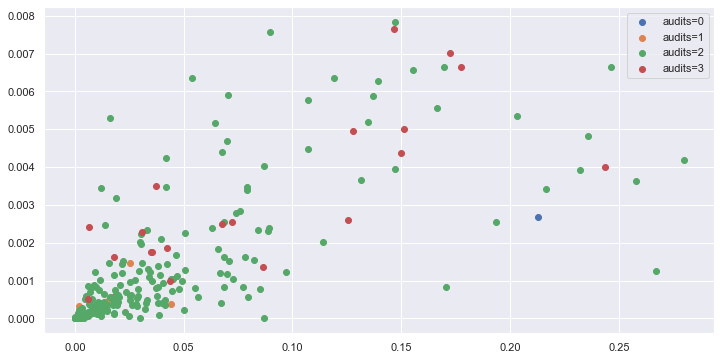

In [115]:
import numpy as np
groupName = 'audits'
gb = df.groupby(by=groupName)
minTVL = 1e7

plt.figure(figsize=(12,6))
for g in gb.groups:
    df_filtered = gb.get_group(g)
    idx = df_filtered.tvlUsd>=minTVL
    display(df_filtered.iloc[0:4,np.r_[0:4,len(df_filtered.columns)-4:len(df_filtered.columns)-1]])
    plt.scatter(df_filtered.loc[idx,'mu'],df_filtered.loc[idx,'sigma'],label='{}={}'.format(groupName,g))
plt.legend()
plt.show()